# <center> <font style="color:rgb(100,109,254)">Image Filtering & Convolution</font>  <center>

#  <font style="color:rgb(134,19,348)">Image Filtering </font>

In computer vision we often convolve an image with a kernel/filter to transform an image or search for something.

A 2d kernel or filter is just a n by n matrix which goes over each patch of the image, A patch is simply a small n by n region of the image centered around the pixel.

You can see below a 3 by 3 patch around the pixel valued 47 (Which is the origin or center pixel for that patch)

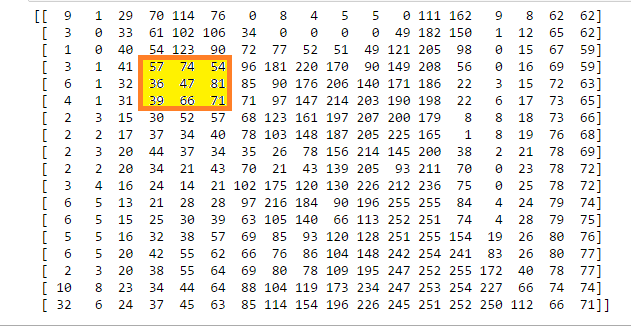

Now an image can have either low frequency information or high frequency information.

`Low Frequency Information`: **An image contains low Freq information if its smooth and there is not much texture to be found.**

`High Frequency Information`: **On the other hand An image contains high Freq information if it has a lot of texture (corners, edges etc).**

Now based on what we want to do, we can perform two types of filtering.

`Low Pass Filtering:` **image blurring/smoothing falls into this category, If you blur the image, you're smoothing out the texture. As the name implies, low pass filtering lets lower frequency information pass and blocks the higher frequency information.**

`High Pass Filtering:` **Things like Image sharpening & edge enhancement falls into this category, As the name  implies, low frequency information is blocked and high frequency information is passed  in this.**


You can see below an animation of what happens when a sharpening convolution or a high pass filter is applied. See how a kernel is multiplied by the whole patch of the image (3x3 in this case) and then averaged and the result is put back in place of origin in a new output image.

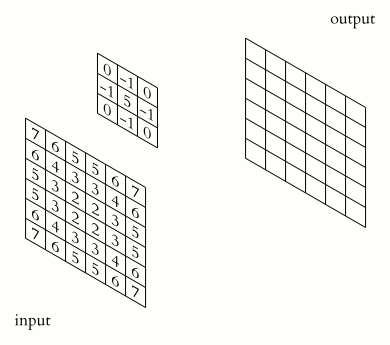
<small>Michael Plotke [<a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>]</small>

**Note:** For Color images the above convolution operation is performed on each channel seperately

Now in the above GIF when the kernel goes through the image, you may notice something funny going on at the boundaries, as the kernel moves through the whole image the origin of the kernel goes through the corners and the edges and in those cases the kernel will go outside of the image and so to handle those cases we can do several things.

- `Ignore boundary pixels:`  **If we just ignore the boundary pixels, the output image will be slightly smaller than the input image.**

- `Zero padd:` **We can pad the input image with zeros at the boundary pixels to make it larger, (the amount of padding will depend upon the size of the kernel) and then perform convolution.**

- `Replicate border:` **Another option is to replicate the boundary pixels of the image and then perform the convolution on this new larger image.**

- `Reflect border:` **Another option is to Reflect the border which makes a smooth intensity transition of pixels at the boundary.**

By default OpenCV Reflects border. And as you can also see in the animation the border is being reflected.

<big>**Note:**</big> Technically speaking the convolution operation described above is actually called Correlation which is pretty similar to convolution with just one difference. In convolution, the kernel is rotated 180 degrees before doing the correlation operation. When the kernel is symmetric, ( which is the case in most of the computer vision & image processing applications correlation and convolution are essentially the same.

Now Generally there are two types of filters

`Linear Filters:`  Now most of these filters are linear filters and they do some linear Combination with the center and the surrounding pixels of the patch. This combination can be as simple as adding all of them up or some sort of multiplication scheme. 
Linear Equation Example:
$$
y = ax + c 
$$

As you can see the above equation is the equation of a line , the powers of variables is not greater than 1 and thus its linear.

`Non-Linear Filters:` These filters perform non Linear mathematical operations with the filter and the patch. Some Non Linear Equations are: 
$$
z = ax^2 + by2 \\
z = ax + by^{3} \\
$$

Remember anything that does not produce a straight line is not linear

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style="color:rgb(134,19,348)">Running a Low Pass Filter in Opencv </font>

Fortunately OpenCV already has a function called `cv2.filter2D()` which is used to perform convolutions on the image on the given image.

[```dst = cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])```](https://docs.opencv.org/4.2.0/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)

- **`src`**	input image.
- **`dst`**	output image of the same size and the same number of channels as src.
- **`ddepth`**	desired depth of the destination image.
- **`kernel`**	convolution kernel (or rather a correlation kernel), a single-channel floating point matrix; if you want to apply different kernels to different channels, split the image into separate color planes using split and process them individually.
- **`anchor`**	anchor of the kernel that indicates the relative position of a filtered point within the kernel; the anchor should lie within the kernel; default value (-1,-1) means that the anchor is at the kernel center.
- **`delta`**	optional value added to the filtered pixels before storing them in dst.
- **`borderType`**	pixel extrapolation method.

The anchor point, delta and at times borderType are mostly left to their default values

### <font style="color:rgb(134,19,348)">Making a Kernel  </font>
Now before we run the kernel/filter over the image we need to construct it first, since we're planning on running a simple smoothing filter, lets construct a kernel with `np.ones` and multiply by a constant value, In this kernel all the values will be same and so its also called the box kernel and we will also divide all the values by the size of the kernel (in our case its 5x5 = 25) We do this because we want all values to sum upto `1` , this will ensure the brightness in the final image stays same, otherwise you will have an image that is n by n times higher in intensity than the original image. 

In [ ]:
kernel_size = 5

# Create a 5*5 kernel of ones dived by total sum
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / kernel_size**2

print (kernel)

###  <font style="color:rgb(134,19,348)">Applying Filter </font>
Now lets pass this kernel in the `filte2D` Function.

**Notice** that we pass in ddepth as `-1`, this means that the output should have the same depth as input i.e. `uint8`

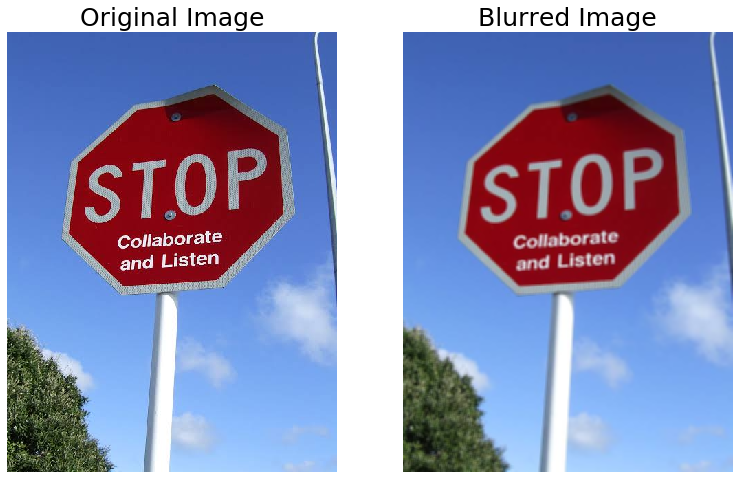

In [4]:
image = cv2.imread('media/M3/stop.jpg')

final_image = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=[13,13])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(122);plt.imshow(final_image[:,:,::-1]);plt.title("Blurred Image",fontdict={'fontsize': 25});plt.axis('off');

##  <font style="color:rgb(134,19,348)">Running a High Pass Filter in Opencv</font>
Now lets make a sharpening filter and run it through the image.
We will use a sharpening filter, now the values for this filter was mathematically computed, the intuition is this:
- Blur the image.
- subtract the blur image from the original to obtain the high freq information.
- Now put the high frequency information back in the image and control the amount using a constant parameter.

Now all of the above can be accomplished by running a single kernel (constant was taken as 1)

In [6]:
kernel = np.array([ [0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]  ] , dtype="int")

print (kernel)

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


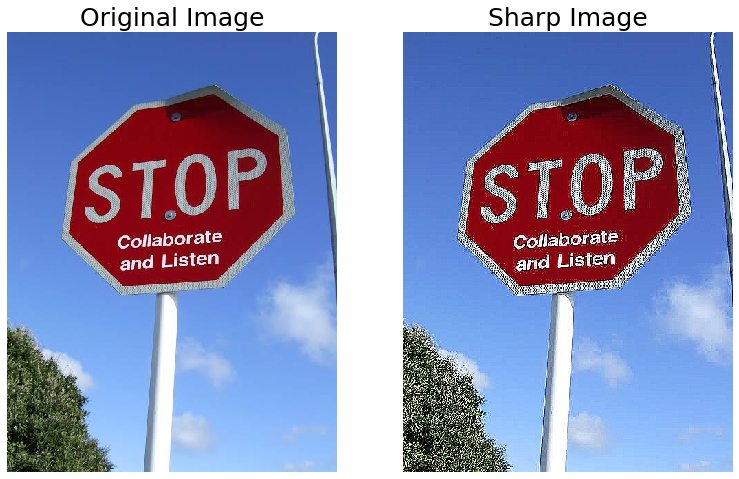

In [7]:
image = cv2.imread('media/M3/stop.jpg')

final_image = cv2.filter2D(image, -1, kernel)

plt.figure(figsize=[13,13])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(122);plt.imshow(final_image[:,:,::-1]);plt.title("Sharp Image",fontdict={'fontsize': 25});plt.axis('off');